In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('credit card.csv')

In [43]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [44]:
df.shape

(30000, 25)

In [45]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [46]:
fill = df['AGE'].median()

In [47]:
df.AGE = df.AGE.fillna(fill)

In [48]:
df.AGE

0        24.0
1        26.0
2        34.0
3        34.0
4        57.0
         ... 
29995    39.0
29996    43.0
29997    37.0
29998    41.0
29999    46.0
Name: AGE, Length: 30000, dtype: float64

In [49]:
X = df.drop(['default.payment.next.month'], axis=1)

In [50]:
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,34.0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [51]:
y = df['default.payment.next.month']

In [52]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [53]:
# Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.30, random_state=1)

In [54]:
# Train Model
import seaborn
from sklearn.svm import SVC  # support vector classifier
r = SVC(gamma='auto')
r.fit(X_train, y_train)

SVC(gamma='auto')

In [55]:
# predict
pred2 = r.predict(X_test)

In [56]:
r.score(X_test, y_test)

0.7777777777777778

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
accuracy_score(y_test, pred2)

0.7777777777777778

In [58]:
confusion_matrix(y_test, pred2)

array([[7000,    0],
       [2000,    0]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [60]:
pred1 = rf.predict(X_test)

In [61]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89      7000\n           1       0.65      0.35      0.45      2000\n\n    accuracy                           0.81      9000\n   macro avg       0.74      0.65      0.67      9000\nweighted avg       0.79      0.81      0.79      9000\n'

In [62]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.65      0.35      0.45      2000

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [63]:

rf.score(X_test, y_test)

0.8132222222222222

In [64]:
accuracy_score(y_test, pred1)

0.8132222222222222

In [65]:
confusion_matrix(y_test, pred1)

array([[6624,  376],
       [1305,  695]], dtype=int64)

In [66]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89      7000\n           1       0.65      0.35      0.45      2000\n\n    accuracy                           0.81      9000\n   macro avg       0.74      0.65      0.67      9000\nweighted avg       0.79      0.81      0.79      9000\n'

In [67]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.65      0.35      0.45      2000

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
d = DecisionTreeClassifier()
d.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
pred = d.predict(X_test)
d.score(X_test, y_test)

0.7205555555555555

[Text(0.7499809962340522, 0.9886363636363636, 'x[6] <= 1.5\ngini = 0.344\nsamples = 21000\nvalue = [16364, 4636]'),
 Text(0.5981228366810536, 0.9659090909090909, 'x[7] <= 1.5\ngini = 0.275\nsamples = 18773\nvalue = [15683, 3090]'),
 Text(0.39660275664023986, 0.9431818181818182, 'x[20] <= 850.5\ngini = 0.242\nsamples = 17161\nvalue = [14744, 2417]'),
 Text(0.1912635761632885, 0.9204545454545454, 'x[12] <= 530.0\ngini = 0.332\nsamples = 5100\nvalue = [4028, 1072]'),
 Text(0.11323253771866586, 0.8977272727272727, 'x[20] <= 1.5\ngini = 0.399\nsamples = 1934\nvalue = [1402, 532]'),
 Text(0.09746695375089709, 0.875, 'x[15] <= 393.0\ngini = 0.422\nsamples = 1379\nvalue = [961, 418]'),
 Text(0.08387689080991809, 0.8522727272727273, 'x[23] <= 164.0\ngini = 0.412\nsamples = 1287\nvalue = [914, 373]'),
 Text(0.06554621456014058, 0.8295454545454546, 'x[1] <= 315000.0\ngini = 0.436\nsamples = 987\nvalue = [670, 317]'),
 Text(0.04163561204493973, 0.8068181818181818, 'x[6] <= 0.5\ngini = 0.41\nsample

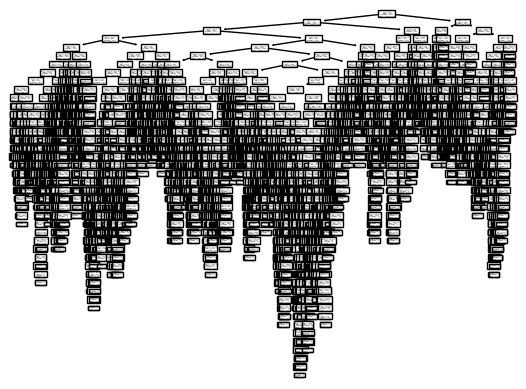

In [84]:
tree.plot_tree(d)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [71]:
accuracy_score(y_test, pred)

0.7205555555555555

In [72]:
confusion_matrix(y_test, pred)

array([[5665, 1335],
       [1180,  820]], dtype=int64)

In [73]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.81      0.82      7000\n           1       0.38      0.41      0.39      2000\n\n    accuracy                           0.72      9000\n   macro avg       0.60      0.61      0.61      9000\nweighted avg       0.73      0.72      0.72      9000\n'

In [74]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7000
           1       0.38      0.41      0.39      2000

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.72      0.72      9000



In [75]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

In [76]:
# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
gnb.predict(X_test)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [77]:
gnb.score(X_test, y_test)

0.37744444444444447

In [78]:
from sklearn.naive_bayes import BernoulliNB

# Create a Gaussian Classifier
bnb = BernoulliNB()

In [79]:
# Train the model using the training sets
bnb.fit(X_train, y_train)

# Predict the response for test dataset
bnb.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
bnb.score(X_test, y_test)

0.771

In [81]:
from sklearn.naive_bayes import MultinomialNB

# Create a Gaussian Classifier
mnb = MultinomialNB()

In [82]:
# Train the model using the training sets
# mnb.fit(X_train, y_train)

# Predict the response for test dataset
# mnb.predict(X_test)

In [85]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [86]:
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [87]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [88]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8145555555555556
